# *MAC0459/21* - Engenharia e ciência de dados <br />_Professor Roberto Hirata_<br /><br />Instituto de Matemática e Estatística | Universidade de São Paulo


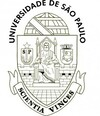


##<br />`Exercício de fixação`


## Desenvolva um modelo não supervisionado por meio do algoritmo K-means para um dos 12 datasets disponíveis na disciplina durante o semestre: 

# 1 - *Chicago Taxis Trips dataset* - Apresentação do modelo *Kmeans* 

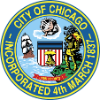

O [ Chicago Taxis Trips dataset](https://https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew) é um conjunto de dados que contém informações sobre viagens de táxi na cidade de Chicago de 2013 a 2018. Os dados incluem detalhes como locais de embarque e desembarque, marcas de tempo, valores de tarifa e valores de gorjeta. O conjunto de dados fornece um recurso valioso para estudar padrões de transporte e demanda na cidade, bem como insights sobre fatores que influenciam o preço das viagens de táxi e o comportamento de gorjeta. Além disso, os dados podem ser usados para informar decisões de políticas relacionadas aos serviços de táxi e planejamento urbano.
<br />
<br />
Este modelo de Kmeans aplicado ao dataset de viagens de taxis de Chicago foi projetado para identificar as melhores localizações para garagens ou centros de distribuição de taxis. Ele faz isso utilizando informações de latitude e longitude dos dados dos taxis para agrupar os veículos em diferentes locais. Com isso, o modelo pode determinar onde é mais conveniente instalar as garagens ou centros de distribuição para que os taxis possam ser alocados de forma mais eficiente e atender a demanda da população de forma mais ágil. 






##1.2 - Import das bibliotecas utilizadas na tarefa:

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV 
import warnings 
warnings.filterwarnings('ignore')


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1.3 - Carregamento dos dados:

In [64]:
df = pd.read_csv("""/content/drive/My Drive/Atividades - Ciência e engenharia de dados/arquivos da prova - MAC 0459/chicago_taxi_trips_2016_12.csv""")

Experimentação Pandas profilling | Status: Error <br />  Erro de execução

In [37]:
df.head(4)

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,5240.0,2016-12-15 23:45:00,2016-12-16 00:00:00,900.0,2.5,NaN,307.0,8.0,32.0,10.75,2.45,0.0,1.0,14.70,Credit Card,NaN,754.0,410.0,64.0,231.0
1,1215.0,2016-12-12 07:15:00,2016-12-12 07:15:00,240.0,0.4,NaN,40.0,28.0,28.0,5.00,3.00,0.0,1.0,9.50,Credit Card,NaN,395.0,408.0,395.0,408.0
2,3673.0,2016-12-16 16:30:00,2016-12-16 17:00:00,2400.0,10.7,NaN,NaN,32.0,NaN,31.00,0.00,0.0,0.0,31.00,Cash,NaN,385.0,478.0,NaN,NaN
3,5400.0,2016-12-16 08:45:00,2016-12-16 09:00:00,300.0,0.0,NaN,787.0,8.0,8.0,5.25,2.00,0.0,0.0,7.25,Credit Card,101.0,688.0,206.0,161.0,649.0


##1.4 - Análise exploratória dos dados

   * Estatística descritiva
   * Matriz de correlação
   * Análise das features de interesse
<br />
<br />
As features de interesse são os dados de latitude e longitude de onde os usuários pegaram o taxi, portanto, não há necessidade de realizar um análise exploratória extensa sobre o dataset uma vez que já está claro as características do objeto de estudo.

### 1.4.0 - Análise descritiva das features

In [38]:
df.describe()

,taxi_id,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1.245094e+06,1.245614e+06,1.245690e+06,0.0,787242.00000,1.131361e+06,1.111901e+06,1.245689e+06,1.245689e+06,1.245689e+06,1.245689e+06,1.245689e+06,671305.000000,1.131368e+06,1.131368e+06,1.113250e+06,1.113250e+06
mean,4.361896e+03,7.565623e+02,2.722639e+00,NaN,514.28259,2.281085e+01,2.106795e+01,1.240251e+01,1.376216e+00,4.248508e-03,9.401077e-01,1.481602e+01,83.407703,3.861354e+02,4.409327e+02,3.964387e+02,4.388257e+02
std,2.511681e+03,1.090555e+03,4.914539e+00,NaN,357.14152,1.879816e+01,1.694041e+01,2.153353e+01,2.654190e+00,1.260149e+00,1.523253e+01,2.784119e+01,38.243598,2.540746e+02,1.890504e+02,2.560480e+02,1.987694e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2.00000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,5.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.229000e+03,3.600000e+02,4.000000e-01,NaN,225.00000,8.000000e+00,8.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,82.000000,1.700000e+02,3.460000e+02,1.700000e+02,2.700000e+02
50%,4.316000e+03,5.400000e+02,1.100000e+00,NaN,504.00000,2.400000e+01,1.600000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+00,101.000000,3.950000e+02,4.780000e+02,4.110000e+02,4.780000e+02
75%,6.524000e+03,9.000000e+02,2.400000e+00,NaN,807.00000,3.200000e+01,3.200000e+01,1.225000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.425000e+01,107.000000,6.040000e+02,6.100000e+02,6.810000e+02,6.100000e+02
max,8.760000e+03,8.634000e+04,9.000000e+02,NaN,1140.00000,7.700000e+01,7.700000e+01,9.026310e+03,4.220000e+02,8.000000e+02,6.666660e+03,9.026310e+03,118.000000,7.840000e+02,7.850000e+02,7.840000e+02,7.850000e+02


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245712 entries, 0 to 1245711
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   taxi_id                 1245094 non-null  float64
 1   trip_start_timestamp    1245712 non-null  object 
 2   trip_end_timestamp      1245630 non-null  object 
 3   trip_seconds            1245614 non-null  float64
 4   trip_miles              1245690 non-null  float64
 5   pickup_census_tract     0 non-null        float64
 6   dropoff_census_tract    787242 non-null   float64
 7   pickup_community_area   1131361 non-null  float64
 8   dropoff_community_area  1111901 non-null  float64
 9   fare                    1245689 non-null  float64
 10  tips                    1245689 non-null  float64
 11  tolls                   1245689 non-null  float64
 12  extras                  1245689 non-null  float64
 13  trip_total              1245689 non-null  float64
 14  pa

### 1.4.1 - Distribuição das features

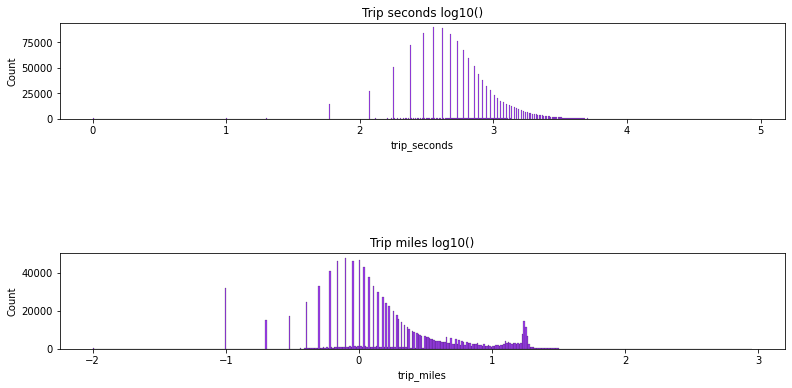

In [40]:
plt.figure(figsize=(13,6))
#plt.tight_layout()
plt.subplot(3,1,1)
plt.title("Trip seconds log10()")
sns.histplot(np.log10(df.trip_seconds), color = "#7e01e8")

plt.subplot(3,1,3)
plt.title("Trip miles log10()")
sns.histplot(np.log10(df.trip_miles), color="#7e01e8")
plt.show()


### 1.4.2 - Correlações entre as features

 * Correlação de Pearson 

<br />
<br />
 
As váriaveis relacionadas aos custos das viagens apresentam correlações acentuadas como esperado.

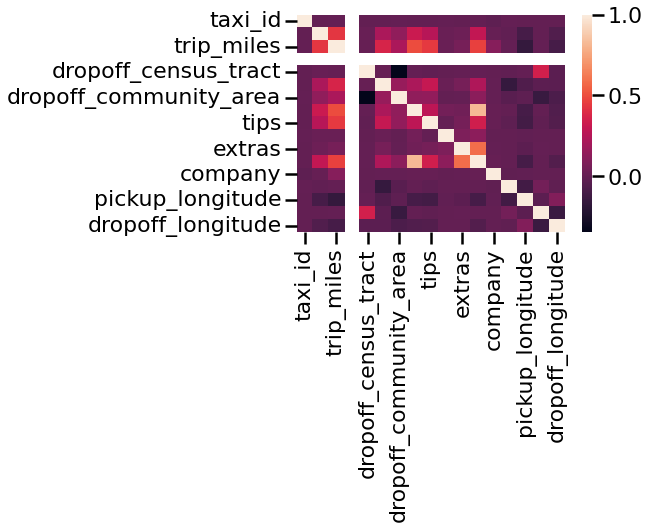

In [65]:
df_corr=df.corr()
sns.heatmap(df_corr)

In [42]:
df[["pickup_longitude"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245712 entries, 0 to 1245711
Data columns (total 1 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   pickup_longitude  1131368 non-null  float64
dtypes: float64(1)
memory usage: 9.5 MB


In [43]:
df[["pickup_latitude"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245712 entries, 0 to 1245711
Data columns (total 1 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   pickup_latitude  1131368 non-null  float64
dtypes: float64(1)
memory usage: 9.5 MB


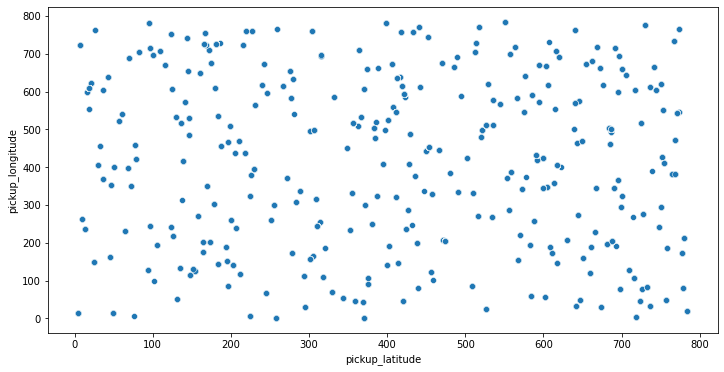

In [44]:
import plotly.express as px
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["pickup_latitude"], y = df['pickup_longitude'])
plt.show()


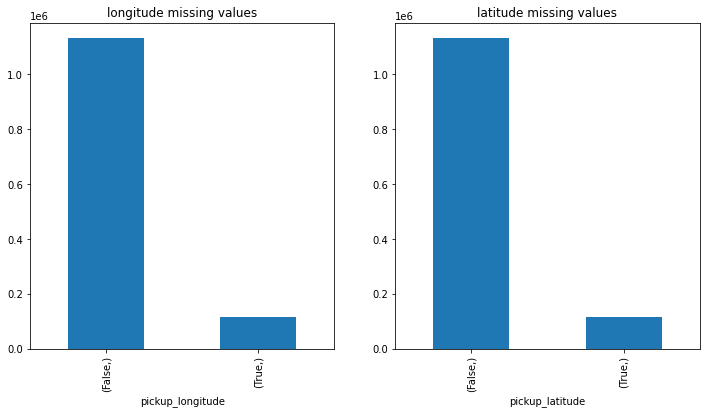

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("longitude missing values")
plt.ylabel(None)
df[["pickup_longitude"]].isnull().value_counts().plot.bar()
plt.subplot(1,2,2)
plt.title("latitude missing values")
df[["pickup_latitude"]].isnull().value_counts().plot.bar()
plt.show()

### 1.4.3 - Verificação de missing values 

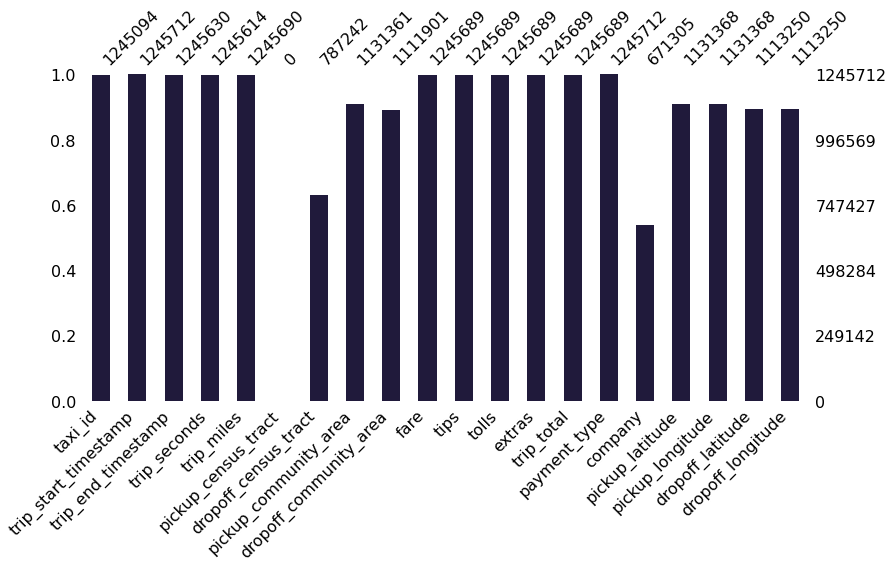

In [46]:
#sns.set_context(context="poster")
msno.bar(df, color = (.126, .1, .232), figsize=(13,6))
plt.show()

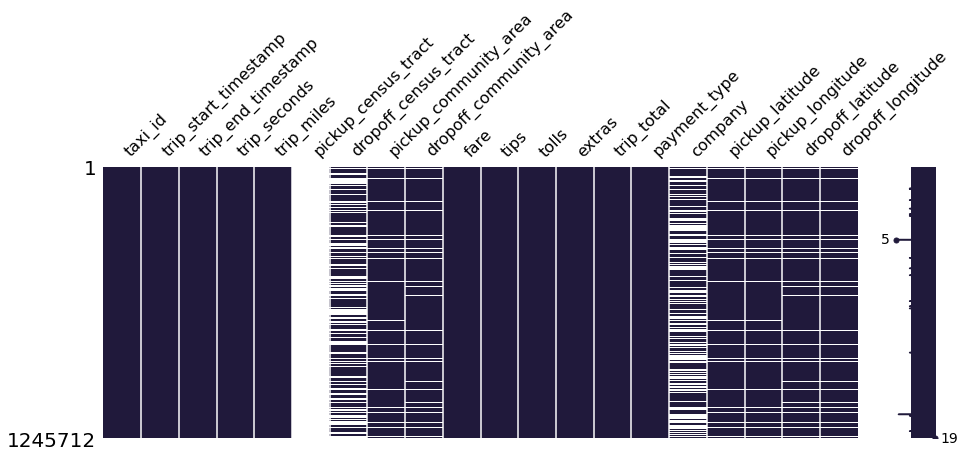

In [47]:
import missingno as msno

msno.matrix(df,figsize=(15,5),color=(.126, .1, .232))
plt.show()

 

##1.5 -  Pré processamento de dados:

  * Exclusão de missing values
  * Transformação em array numpy
<br />
<br />

Os valores contidos na variáveis de latitude e longitude adotadas para a tarefa variam entre 0.0 e 0.8, ou seja, estão variando em um intervalo entre 0 e 1, portanto, não precisarão ser normalizados ou padronizados.

<br />
<br />



In [48]:
geo_locations = np.stack((df['pickup_latitude'], df['pickup_longitude']), axis=1)
geo_locations

array([[754., 410.],
       [395., 408.],
       [385., 478.],
       ...,
       [385., 478.],
       [225.,   6.],
       [ nan,  nan]])

In [49]:
geo_locations1 = pd.DataFrame(geo_locations)

In [50]:
geo_locations1.replace([np.inf, -np.inf], np.nan)


,0,1
0,754.0,410.0
1,395.0,408.0
2,385.0,478.0
3,688.0,206.0
4,618.0,407.0
...,...,...
1245707,385.0,478.0
1245708,144.0,741.0
1245709,385.0,478.0
1245710,225.0,6.0


In [51]:
geo_locations1.dropna(inplace=True)

In [52]:
geo_locations1.to_numpy()

array([[754., 410.],
       [395., 408.],
       [385., 478.],
       ...,
       [144., 741.],
       [385., 478.],
       [225.,   6.]])

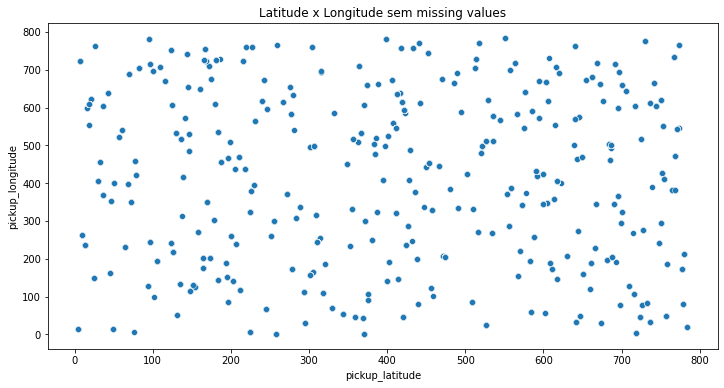

In [53]:
plt.figure(figsize=(12, 6))
plt.title("Latitude x Longitude sem missing values")
sns.scatterplot(x=df['pickup_latitude'], y=df['pickup_longitude'])
plt.show()



# 2 - Etapa de Modelagem do problema

* Seleção de hiperparâmetros via GridSearchCV
* Método elbow
<br />
<br />

O uso de GridSearch e o método elbow foram aplicados para, principalmente, o cientista concluir qual seria o método mais eficiente para identificação do número de clusters, evidentemente, o GridSearch apresenta mais oportunidades, uma vez que testa a perfomance de outros hiperparâmetros do modelo, contudo, a quantidade de clusters do método Elbow foi adotada por razões livres.


In [54]:
kmeans = KMeans()

# Define os hiperparâmetros a serem testados
param_grid = {
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500],
    'tol': [1e-4, 1e-6, 1e-8]
}

# Executa o Grid Search
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(geo_locations1)

# Exibe o melhor conjunto de hiperparâmetros
print("Melhor conjunto de hiperparâmetros: ", grid_search.best_params_)

Melhor conjunto de hiperparâmetros:  {'init': 'k-means++', 'max_iter': 100, 'tol': 0.0001}


In [55]:
def find_optimal_clusters(data, max_k):
    iters = 300
    sse = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, max_iter=iters, tol=1e-04).fit(data)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=[12,7])
    sns.set_context("poster")
    sns.lineplot(range(1, max_k+1), sse)
    plt.xlabel("Number of clusters")
    plt.ylabel("SSE")
    plt.show()

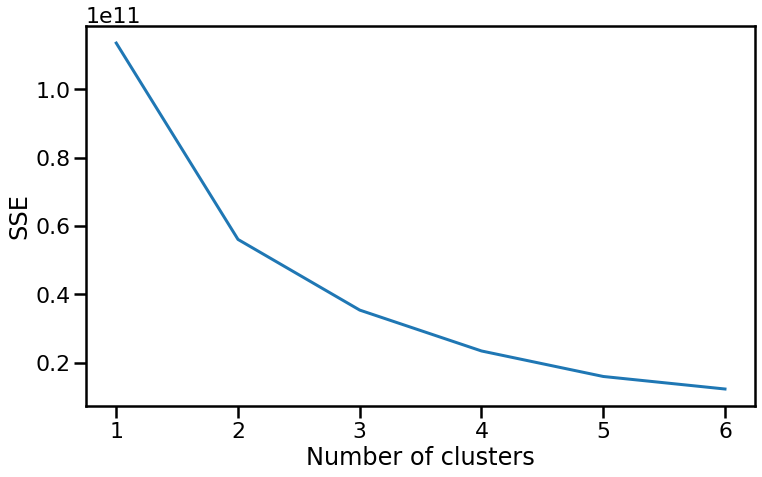

In [56]:
find_optimal_clusters(geo_locations1, 6)

In [57]:
kmeans = KMeans(n_clusters= 3, init = 'k-means++', n_init = 10, max_iter = 300)

In [59]:
pred_y = kmeans.fit_predict(geo_locations1)

Text(0, 0.5, 'Longitude')

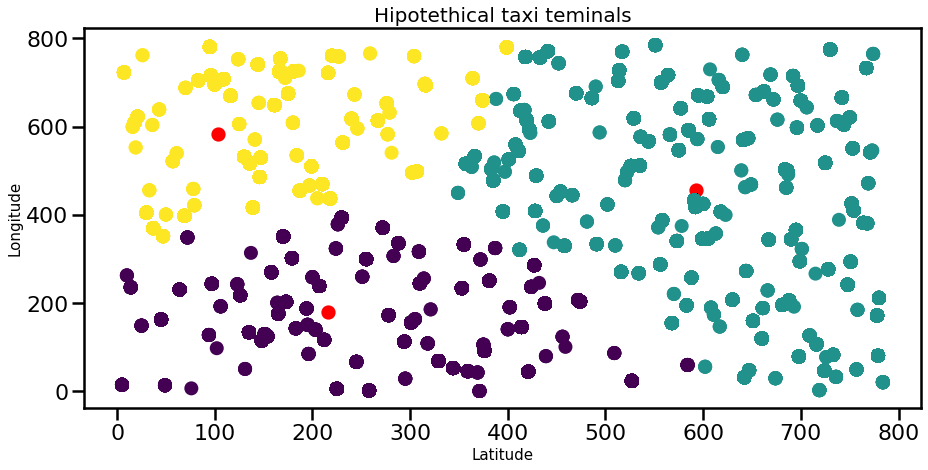

In [86]:
plt.figure(figsize=(15,7))
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s = 150, c = 'red') #posição de cada centroide no gráfico
plt.scatter(geo_locations1[0],geo_locations1[1], c=pred_y)
plt.title('Hipotethical taxi teminals',size=20)
plt.xlabel('Latitude', size=15)
plt.ylabel('Longitude',size=15)

In [87]:
# import plotly.express as px
# import pandas as pd

# df = pd.DataFrame({'x': geo_locations1[0], 'y': geo_locations1[1], 'group': pred_y})
# df.group.replace(to_replace="Centers", value=1, inplace=True)
# centers = pd.DataFrame({'x': kmeans.cluster_centers_[:, 0], 'y': kmeans.cluster_centers_[:, 1], 'group':5 })
# df = pd.concat([df, centers])
# fig.update_layout(width=600, height=400)

# fig = px.scatter(df, x='x', y='y', color='group',color_discrete_map=["red", "green", "blue"], size_max=50, title='Hipotethical Taxi terminals', labels={'x':'Latitude', 'y':'Longitude'})
# fig.show()

# 3 - Conclusões

Os centróides gerados pelo modelo para os datapoints de latitude e longitude das viagens de taxi constam no gráfico de dispersão acima em vermelho. Estes representam os terminais de táxi gerados com base na distância euclideana entre os datapoints de acordo com o funcionamento do KMeans.
 <br />
 <br />
 * `Limitações do projeto e observações para futuras melhorias:`
 <br />
 <br />
 <br />
  A príncipio, o cientista considerou realizar a conversão das coordenadas de latitude e longitude para criar gráficos usando o mapa real da cidade de Chicago, isso poderia ser feito com uso da biblioteca GeoPandas para plotagem  dos mapas e numpy para conversão de coordenadas geográficas, entretanto, a escala dos datapoints se mostrou bastante conveniente para a modelagem uma vez que constam como pertencentes ao intervalo 0 e 1, vale ressalva para melhoria futura do modelo.